# GSEAPY Example

## 1. Load essential packages

In [1]:
%matplotlib inline
import pandas as pd
import gseapy as gp

Check gseapy version

In [2]:
gp.__version__

'0.6.0'

## 2. Enrichr Example

### i. Assign enrichr with gene list object

In [3]:
gene_list = pd.read_table("./gene_list.txt",header=None)
gene_list.head()

,0
0,CTLA2B
1,SCARA3
2,LOC100044683
3,CMBL
4,CLIC6


In [4]:
glist = gene_list.squeeze().tolist()
print(glist[:10])

['CTLA2B', 'SCARA3', 'LOC100044683', 'CMBL', 'CLIC6', 'IL13RA1', 'TACSTD2', 'DKKL1', 'CSF1', 'CITED1']


In [5]:
# run gseapy 
enrichr_results = gp.enrichr(gene_list=glist, description='KEGG', gene_sets='KEGG_2016', outfile='enrichr_kegg')
# and provide a txt file for enrichr will also work, in this way, no DataFrame will return
# enrichr_results = gp.enrichr(gene_list='./gene_list.txt', description='KEGG', gene_sets='KEGG_2016', outfile='enrichr_kegg')

Enrichr API : Analysis name:  KEGG
Enrichr API : Enrichr Library:  KEGG_2016
Enrichr API : Job ID: {'shortId': 'hmub', 'userListId': 1677700}
Enrichr API : Submitted gene list: {'shortId': 'hmub', 'userListId': 1677700}
Enrichr API : Get enrichment results: Job Id: {'shortId': 'hmub', 'userListId': 1677700}
Enrichr API : Downloading file of enrichment results: Job Id: {'shortId': 'hmub', 'userListId': 1677700}
Enrichr API : Results written to: enrichr_kegg.txt
Enrichr API : You are seeing this message, because you are inside python console.
Enrichr API : It will return a pandas dataframe for veiwing results.


In [6]:
enrichr_results.head()

,Term,Overlap,P-value,Adjusted P-value,Z-score,Combined Score,Genes
0,Rap1 signaling pathway_Homo sapiens_hsa04015,19/211,0.000436,0.103734,-1.961363,4.444307,PDGFRB;CSF1;FLT4;VEGFC;ARAP3;LPAR4;ADCY7;ADCY6...
1,Pathways in cancer_Homo sapiens_hsa05200,27/397,0.001816,0.152127,-2.083086,3.922533,RET;LEF1;TGFA;LPAR4;ADCY7;ETS1;ADCY6;GLI2;FGF4...
2,Ras signaling pathway_Homo sapiens_hsa04014,18/227,0.002351,0.152127,-1.956845,3.684817,PDGFRB;CSF1;FLT4;VEGFC;ETS1;GNG13;FGF4;PLD2;EF...
3,Dilated cardiomyopathy_Homo sapiens_hsa05414,10/90,0.002557,0.152127,-1.805957,3.400689,DES;SGCB;TPM2;TNNC1;LMNA;TPM1;ITGAV;ADCY7;ADCY...
4,HTLV-I infection_Homo sapiens_hsa05166,19/258,0.003877,0.184562,-1.843079,3.114379,PDGFRB;STAT5B;EGR1;JUN;CD40;FZD2;CRTC3;NFATC1;...


Make a bar plot of enrichment results

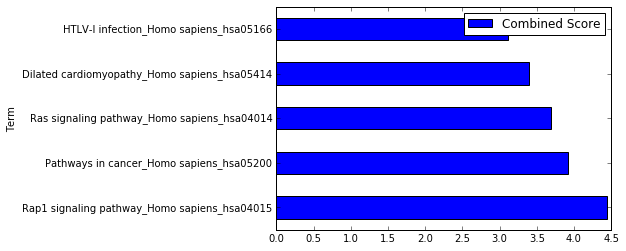

In [8]:
enrichr_results.head(5).plot.barh(x='Term',y='Combined Score')

### ii . Commandline usage 

You may also want to use enrichr in commandline, but not DataFrame will print return to the console.

In [9]:
!gseapy enrichr -i ./gene_list.txt -d 'KEGG' -g KEGG_2016 -o 'KEGG_2016_2'

Enrichr API : Analysis name:  'KEGG'
Enrichr API : Enrichr Library:  KEGG_2016
Enrichr API : Job ID: {'userListId': 1677701, 'shortId': 'hmuc'}
Enrichr API : Submitted gene list: {'userListId': 1677701, 'shortId': 'hmuc'}
Enrichr API : Get enrichment results: Job Id: {'userListId': 1677701, 'shortId': 'hmuc'}
Enrichr API : Downloading file of enrichment results: Job Id: {'userListId': 1677701, 'shortId': 'hmuc'}
Enrichr API : Results written to: 'KEGG_2016_2'.txt
Enrichr API : Done


## 3. Prerank example

### i. Assign prank with a pandas DataFrame

In [10]:
rank = pd.read_table("./edb/gsea_data.gsea_data.rnk",header=None)
rank.head()

,0,1
0,CTLA2B,2.502482
1,SCARA3,2.095578
2,LOC100044683,1.116398
3,CMBL,0.877640
4,CLIC6,0.822181


In [11]:
# run prerank
# enrichr library are supported by prerank module. Just provide the name
# you may also provide a gene_sets file in gmt format, just like GSEA do.
prerank_results = gp.prerank(rnk=rank,gene_sets='KEGG_2016',outdir='prerank_report')

# or provide a rnk file will also work, but not DataFrame will return
#prerank_results = gp.prerank(rnk="./edb/gsea_data.gsea_data.rnk",gene_sets='KEGG_2016',outdir='prerank_report')

286 gene_sets have been filtered out when max_size=1000 and min_size=15
7 gene_sets used for further calculating
Start to compute enrichment socres...................... Mon Aug 22 13:10:24 2016
Start to compute esnulls................................ Mon Aug 22 13:10:24 2016
......This step might take a while to run. Be patient...
Start to compute pvals.................................. Mon Aug 22 13:10:24 2016
start to compute fdrs................................... Mon Aug 22 13:10:24 2016
Statistial testing finished............................. Mon Aug 22 13:10:24 2016
Start to generate gseapy reports, and produce figures... Mon Aug 22 13:10:24 2016
Congratulations. GSEAPY run successfully................
The Job is done.................................Goodbye! Mon Aug 22 13:10:29 2016


In [12]:
prerank_results.head(3)

,es,nes,pval,fdr,gene_set_size,matched_size,rank_ES,genes,hit_index
Enrich_terms,,,,,,,,,
Pathways in cancer_Homo sapiens_hsa05200,-0.188934,-1.106978,0.300000,0.289726,397,27,"[-0.0014992503748125937, -0.002998500749625187...","[TGFBR2, LAMB3, RET, PDGFRB, ADCY6, ETS1, TGFA...","[48, 125, 150, 169, 177, 196, 218, 221, 251, 2..."
MAPK signaling pathway_Homo sapiens_hsa04010,0.179667,0.550193,0.814667,0.875841,255,18,"[-0.0014792899408284023, -0.002958579881656804...","[CACNA1H, TGFBR2, FLNC, MAP3K5, PDGFRB, PPP3CC...","[31, 48, 83, 159, 169, 190, 267, 289, 317, 349..."
HTLV-I infection_Homo sapiens_hsa05166,0.338286,1.108560,0.322157,0.930419,258,19,"[-0.0014814814814814814, -0.002962962962962963...","[CRTC3, TGFBR2, CD40, PDGFRB, ADCY6, PPP3CC, E...","[27, 48, 54, 169, 177, 190, 196, 221, 228, 259..."


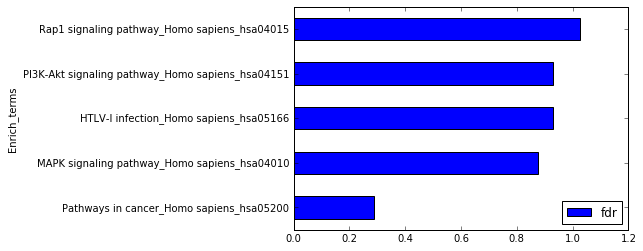

In [15]:
prerank_results = prerank_results.reset_index()
prerank_results.head(5).plot.barh(y='fdr',x='Enrich_terms')

### ii . Commanline usage 

You may also want to use preank in commandline, but not DataFrame will print return to the console.

In [16]:
! gseapy prerank -r ./edb/gsea_data.gsea_data.rnk -g KEGG_2016 -o prerank_report_2

286 gene_sets have been filtered out when max_size=1000 and min_size=15
7 gene_sets used for further calculating
Start to compute enrichment socres...................... Mon Aug 22 13:16:01 2016
Start to compute esnulls................................ Mon Aug 22 13:16:01 2016
......This step might take a while to run. Be patient...
Start to compute pvals.................................. Mon Aug 22 13:16:02 2016
start to compute fdrs................................... Mon Aug 22 13:16:02 2016
Statistial testing finished............................. Mon Aug 22 13:16:02 2016
Start to generate gseapy reports, and produce figures... Mon Aug 22 13:16:02 2016
Congratulations. GSEAPY run successfully................
The Job is done.................................Goodbye! Mon Aug 22 13:16:07 2016


## 4. Call Example

### i. Assign call with a pandas DataFrame

and cls with a list object

In [17]:
phenoA,phenoB,class_vector =  gp.parser.gsea_cls_parser("./P53.cls")

In [18]:
print(class_vector)

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']


In [20]:
gene_exp = pd.read_table("./P53_resampling_data.txt")
gene_exp.head()

,NAME,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,CTLA2B,111.19,86.22,121.85,75.19,208.62,130.59,124.72,324.09,242.71,...,163.76,59.50,134.12,152.09,197.46,137.79,81.53,123.37,81.41,180.78
1,SCARA3,460.30,558.34,183.55,37.29,158.00,43.61,80.83,300.08,1250.25,...,109.91,120.42,73.06,115.03,95.12,37.56,76.16,41.10,77.51,519.17
2,LOC100044683,97.25,118.94,81.17,119.51,119.88,107.73,165.57,203.97,135.43,...,222.84,124.98,114.75,141.66,170.19,147.70,157.48,152.18,98.89,118.06
3,CMBL,33.45,55.10,221.67,50.30,35.12,75.70,84.01,44.12,79.96,...,51.32,117.11,59.46,78.46,45.55,49.07,96.69,33.09,10.38,52.89
4,CLIC6,35.75,41.26,63.04,219.86,42.53,54.19,86.98,71.20,53.89,...,154.05,31.62,37.66,32.64,63.35,27.95,70.99,36.25,17.50,49.41


In [21]:
# run call
# enrichr library are supported by prerank module. Just provide the name
# you may also provide a gene_sets file in gmt format, just like GSEA do.
call_results = gp.call(data=gene_exp,gene_sets='KEGG_2016',cls=class_vector,outdir='call_reprot',)

# or provide a rnk file will also work, but not DataFrame will return
#call_results = gp.call(data='./P53_resampling_data.txt',gene_sets='edb/gene_sets.gmt',cls='./P53.cls',outdir='call_reprot',)


286 gene_sets have been filtered out when max_size=1000 and min_size=15
7 gene_sets used for further calculating
Start to compute enrichment socres...................... Mon Aug 22 13:17:35 2016
Start to compute esnulls................................ Mon Aug 22 13:17:35 2016
......This step might take a while to run. Be patient...
Start to compute pvals.................................. Mon Aug 22 13:17:36 2016
start to compute fdrs................................... Mon Aug 22 13:17:36 2016
Statistial testing finished............................. Mon Aug 22 13:17:36 2016
Start to generate gseapy reports, and produce figures....... Mon Aug 22 13:17:36 2016
...Congratulations. GSEAPY run successfully!!!.............
...The Job is done...........................Goodbye!


In [22]:
call_results.head(5)

,es,nes,pval,fdr,gene_set_size,matched_size,rank_ES,genes,hit_index
Enrich_terms,,,,,,,,,
Ras signaling pathway_Homo sapiens_hsa04014,-0.235547,-0.656496,0.936556,0.933699,227,18,"[-0.0014814814814814814, -0.002962962962962963...","[CACNA1H, RUNX3, GM967, DUSP14, RAB6B, CHRNB1,...","[31, 72, 113, 141, 161, 179, 195, 198, 230, 23..."
PI3K-Akt signaling pathway_Homo sapiens_hsa04151,0.216731,0.339975,0.974880,0.988990,341,22,"[-0.0014903129657228018, -0.002980625931445603...","[CACNA1H, RUNX3, LOC677224, DUSP14, CHRNB1, H1...","[31, 72, 73, 141, 179, 183, 195, 198, 230, 237..."
HTLV-I infection_Homo sapiens_hsa05166,-0.242165,-0.678821,0.913947,1.140731,258,19,"[-0.001483679525222552, -0.002967359050445104,...","[CHST8, ATRNL1, GRAMD1C, GM967, RAB6B, STK39, ...","[71, 75, 102, 113, 161, 165, 178, 197, 230, 24..."
Rap1 signaling pathway_Homo sapiens_hsa04015,-0.253654,-0.784385,0.738462,1.292934,211,19,"[-0.001483679525222552, -0.002967359050445104,...","[CACNA1H, DUSP14, RAB6B, SNX9, GPSM1, RHOB, HI...","[31, 141, 161, 198, 230, 237, 283, 295, 319, 3..."
MAPK signaling pathway_Homo sapiens_hsa04010,-0.409122,-1.155688,0.287540,1.349240,255,18,"[-0.0014814814814814814, -0.002962962962962963...","[BC006779, RAB6B, STK39, NPTX1, ETS1, SNX9, GP...","[74, 161, 165, 178, 195, 198, 230, 237, 247, 2..."


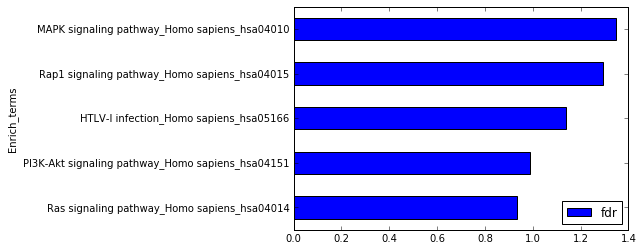

In [25]:
call_results = call_results.reset_index()
call_results.head(5).plot.barh(y='fdr',x='Enrich_terms')

### ii . Commanline usage 

You may also want to use call in commandline, but not DataFrame will print return to the console.

In [27]:
!gseapy call -d ./P53_resampling_data.txt -g KEGG_2016 -c ./P53.cls -o call_reprot_2

286 gene_sets have been filtered out when max_size=1000 and min_size=15
7 gene_sets used for further calculating
Start to compute enrichment socres...................... Mon Aug 22 13:25:30 2016
Start to compute esnulls................................ Mon Aug 22 13:25:30 2016
......This step might take a while to run. Be patient...
Start to compute pvals.................................. Mon Aug 22 13:25:31 2016
start to compute fdrs................................... Mon Aug 22 13:25:31 2016
Statistial testing finished............................. Mon Aug 22 13:25:31 2016
Start to generate gseapy reports, and produce figures....... Mon Aug 22 13:25:31 2016
...Congratulations. GSEAPY run successfully!!!.............
...The Job is done...........................Goodbye!
